# 데이터 준비

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# 데이터 로딩

In [5]:
df = pd.read_csv("/gdrive/MyDrive/tmp/fraud_detection_bank_dataset.csv.zip")
df.head(10)

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,...,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,0,0,0,0,0,1,0,1,0,0,0,0,0,9,74,19,25,0,0,1,3,24,0,0,0,2,0,97,0,981,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,4,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7,1,0,0,0,1,1,0,0,0,0,0,0,0,0,18,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,13,7,5,0,0,1,5,0,0,0,0,0,0,5,0,91,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,0,0,0,0,0,0,0,1,0,0,0,0,0,23,52,1,7,0,0,1,1,1,9,0,0,0,0,3,0,26,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,20,3,11,0,0,1,4,20,0,0,0,0,0,52,0,669,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,175,1
5,5,0,11,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,95,1
6,6,12,2584,0,6,0,4,0,12,0,0,0,0,0,0,1,0,1,0,0,0,0,0,20,415,9,4,104,0,1,4,52,1,0,0,4,0,61,7,1035,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,1,0,1,1,0,0,0,78,1
7,7,10,6036,0,3,0,24,2,10,0,0,0,0,0,0,1,0,1,0,0,0,0,0,11,117,26,10,0,0,1,2,14,0,0,0,0,0,126,0,6856,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,1,0,1,1,0,0,0,103,1
8,8,0,1233,0,8,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,43,17,1,0,0,1,7,2,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,0,1,0,191,1
9,9,0,182,0,1,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,11,2,0,0,1,1,8,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,392,1


In [6]:
print(len(df))

20468


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB


In [8]:
df.targets.unique()

array([1, 0])

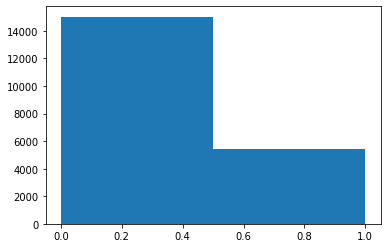

In [9]:
plt.hist(df.targets, bins=2)
plt.show()

In [10]:
print(df.targets.value_counts())

0    15030
1     5438
Name: targets, dtype: int64


In [11]:
df = df.sample(frac=1)

# Normalize

In [12]:
df = (df - df.min()) / (df.max() - df.min())

In [13]:
df.isna().sum().sum()

307020

In [14]:
df.fillna(0, inplace= True)
df.isna().sum().sum()

0

In [15]:
df_orgin = df.copy()

#by AutoEncoder

## train / test 데이터 분리

In [16]:
class1_df = df[df.targets==1]
class1_count = len(class1_df)
print(class1_count)

5438


In [17]:
class0_df = df[df.targets==0]
print(len(class0_df))

15030


In [18]:
class0_df = class0_df.reset_index()
class0_df.head()

,index,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,...,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,11170,0.545757,0.000435,0.001481,0.000000,0.002591,0.0,0.000000,0.083333,0.000435,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000299,0.000174,0.001100,0.002886,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,10998,0.537353,0.000000,0.000476,0.001106,0.000000,0.0,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000087,0.001100,0.000000,0.0,0.0,1.0,0.004926,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,9302,0.454488,0.000000,0.002090,0.000000,0.000000,0.0,0.004348,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000436,0.001100,0.000000,0.0,0.0,1.0,0.019704,0.002055,0.0,0.0,0.0,0.002334,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009371,0.0
3,15568,0.760639,0.000000,0.001111,0.000000,0.001295,0.0,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.001100,0.000000,0.0,0.0,1.0,0.004926,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000032,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,18422,0.900083,0.000869,0.009019,0.000000,0.012953,0.0,0.000000,0.083333,0.000869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000597,0.001655,0.011001,0.004329,0.0,0.0,1.0,0.000000,0.008222,0.0,0.0,0.0,0.002334,0.0,0.000042,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061580,0.0


In [19]:
class0_df = class0_df.reset_index()

class0_test_df = class0_df.iloc[class0_df.index<=class1_count]
class0_df.drop(class0_test_df.index, inplace=True)
print(len(class0_test_df))
print(len(class0_df))

5439
9591


In [20]:
train_df = class0_df
print(len(train_df))
test_df = class1_df.append(class0_test_df)
print(len(test_df))

9591
10877


# numpy로 변환

In [21]:
train_df.drop(columns=["Unnamed: 0", "level_0", "index", "targets"], inplace=True)
print(train_df.head())

         col_0     col_1     col_2  ...  col_109  col_110   col_111
5439  0.000435  0.001375  0.000000  ...      0.0      0.0  0.009371
5440  0.000000  0.003915  0.002212  ...      0.0      0.0  0.006693
5441  0.000000  0.001984  0.000000  ...      0.0      0.0  0.026774
5442  0.000000  0.000846  0.001106  ...      0.0      0.0  0.060241
5443  0.000869  0.001561  0.000000  ...      0.0      0.0  0.000000

[5 rows x 112 columns]


In [22]:
train_data = train_df.to_numpy()
print(train_data.shape)

(9591, 112)


In [23]:
test_df.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,...,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets,level_0,index
4158,0.203156,0.001304,0.003782,0.0,0.000000,0.0,0.008696,0.083333,0.001304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000896,0.001916,0.0022,0.0,0.0,0.0,1.0,0.004926,0.002055,0.0,0.0,0.0,0.0,0.0,0.000095,0.0,0.002932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060241,1.0,NaN,NaN
2361,0.115356,0.000000,0.001613,0.0,0.001295,0.0,0.004348,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000174,0.0011,0.0,0.0,0.0,1.0,0.004926,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,NaN,NaN
3114,0.152147,0.000000,0.000767,0.0,0.000000,0.0,0.008696,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000174,0.0011,0.0,0.0,0.0,1.0,0.004926,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,NaN,NaN
2260,0.110422,0.000000,0.001164,0.0,0.000000,0.0,0.004348,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000087,0.0011,0.0,0.0,0.0,1.0,0.019704,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087015,1.0,NaN,NaN
2578,0.125959,0.000000,0.002063,0.0,0.001295,0.0,0.004348,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000174,0.0022,0.0,0.0,0.0,1.0,0.029557,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073628,1.0,NaN,NaN


In [24]:
test_y = test_df.targets.to_numpy()
print(test_y.shape)
print(test_y[:10])

(10877,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
test_df.drop(columns=["Unnamed: 0", "level_0", "index", "targets"], inplace=True)
test_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111
4158,0.001304,0.003782,0.0,0.000000,0.0,0.008696,0.083333,0.001304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000896,0.001916,0.0022,0.0,0.0,0.0,1.0,0.004926,0.002055,0.0,0.0,0.0,0.0,0.0,0.000095,0.0,0.002932,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060241
2361,0.000000,0.001613,0.0,0.001295,0.0,0.004348,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000174,0.0011,0.0,0.0,0.0,1.0,0.004926,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3114,0.000000,0.000767,0.0,0.000000,0.0,0.008696,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000174,0.0011,0.0,0.0,0.0,1.0,0.004926,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2260,0.000000,0.001164,0.0,0.000000,0.0,0.004348,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000087,0.0011,0.0,0.0,0.0,1.0,0.019704,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087015
2578,0.000000,0.002063,0.0,0.001295,0.0,0.004348,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000174,0.0022,0.0,0.0,0.0,1.0,0.029557,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000041,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073628


In [26]:
test_data = test_df.to_numpy()
print(test_data.shape)
print(test_data[0])

(10877, 112)
[1.30378096e-03 3.78226830e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.69565217e-03 8.33333333e-02 1.30378096e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.95789788e-04 1.91637631e-03
 2.20022002e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 4.92610837e-03 2.05549846e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.50952009e-05 0.00000000e+00 2.93243133e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.92779840e-04
 2.19058050e-04 2.14797136e-04 5.49320388e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.79721801e-03 8.24594918e-05
 0.00000000e+00 7.91922392e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.72711572e-04
 0.00000000

# 모델 학습

In [28]:
feature_count = train_data.shape[1]
print(feature_count)

112


In [29]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [31]:
model = Sequential()
model.add(Dense(25, activation='relu', input_dim=feature_count))
model.add(Dense(5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(feature_count))

model.compile(optimizer='Adam', loss='mae', metrics=["mape"])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  

hist = model.fit(train_data, train_data, epochs=500, batch_size=1024, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/500
9/9 [==============================] - 2s 34ms/step - loss: 0.0493 - mape: 4980431.0000 - val_loss: 0.0452 - val_mape: 2466160.2500
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0450 - mape: 1570346.5000 - val_loss: 0.0432 - val_mape: 807983.1875
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0438 - mape: 620184.9375 - val_loss: 0.0426 - val_mape: 453293.5312
Epoch 4/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0434 - mape: 437876.5625 - val_loss: 0.0424 - val_mape: 387625.6562
Epoch 5/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0432 - mape: 404877.8125 - val_loss: 0.0422 - val_mape: 394315.7188
Epoch 6/500
9/9 [==============================] - 0s 6ms/step - loss: 0.0430 - mape: 377240.1562 - val_loss: 0.0421 - val_mape: 372399.1562
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0429 - mape: 384974.9062 - val_loss: 0.0419 - val_mape: 390424.9375
Epoch 8/5

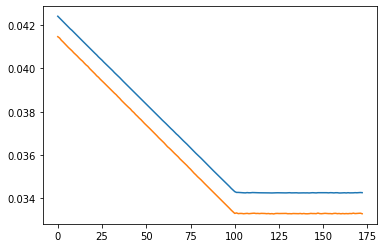

In [32]:
plt.plot(hist.history['loss'][10:])
plt.plot(hist.history['val_loss'][10:])
plt.show()

# 탐지 실행

## threshold 구하기

In [34]:
reconstructed = model.predict(train_data)

train_mae = np.mean(np.abs(reconstructed - train_data), axis=-1)
print(train_mae)

[0.0137227  0.02093965 0.0400216  ... 0.01158254 0.01051222 0.09481563]


In [35]:
print(reconstructed.shape)

(9591, 112)


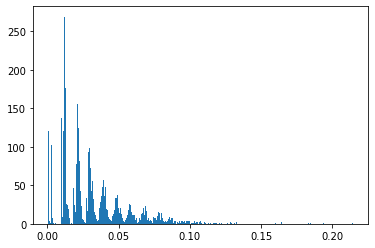

In [36]:
plt.hist(train_mae, bins=1000)
plt.show()

In [37]:
sorted_mae = np.sort(train_mae)
threshold_index = int(len(sorted_mae)*0.99)
threshold = sorted_mae[threshold_index]

print(threshold)

0.10771411692203284


## 테스트 데이터 모델 예측

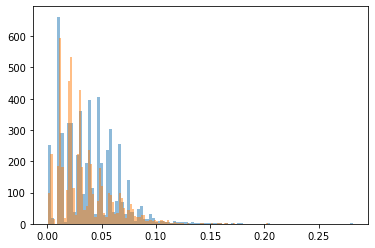

In [40]:
reconstructed = model.predict(test_data)
test_mae = np.mean(np.abs(reconstructed - test_data), axis=-1)

half_index = int(len(test_mae)*0.5)
plt.hist(test_mae[:half_index], bins=100, alpha=0.5)
plt.hist(test_mae[half_index:], bins=100, alpha=0.5)
plt.show()

In [42]:
predicted = (test_mae > threshold).astype(np.int)

n = len(test_data)
accuracy = (predicted == test_y).sum() / n

print("accuracy=", accuracy)

accuracy= 0.5037234531580399


In [46]:
for i in range(1, 15):
    predicted = (test_mae > threshold*i/10.).astype(np.int)

    n = len(test_data)
    accuracy = (predicted == test_y).sum() / n

    print(i, "accuracy=", accuracy)
        

1 accuracy= 0.5043670129631332
2 accuracy= 0.5310287763169992
3 accuracy= 0.5722166038429715
4 accuracy= 0.5644019490668383
5 accuracy= 0.5449112806840122
6 accuracy= 0.5179737059851062
7 accuracy= 0.5039073273880665
8 accuracy= 0.503447641813
9 accuracy= 0.5029879562379332
10 accuracy= 0.5037234531580399
11 accuracy= 0.5039992645030799
12 accuracy= 0.5024363335478532
13 accuracy= 0.50124115105268
14 accuracy= 0.5007814654776133


#by Classifier

##x,y 데이터 분리

In [47]:
df = df_orgin.copy()

In [48]:
y = df.targets.to_numpy()
print(y.shape)
print(y[:10])

(20468,)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [49]:
df.drop(columns=["Unnamed: 0", "targets"], inplace=True)
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111
11170,0.000435,0.001481,0.000000,0.002591,0.0,0.000000,0.083333,0.000435,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000299,0.000174,0.0011,0.002886,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
10998,0.000000,0.000476,0.001106,0.000000,0.0,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000087,0.0011,0.000000,0.0,0.0,1.0,0.004926,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9302,0.000000,0.002090,0.000000,0.000000,0.0,0.004348,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000436,0.0011,0.000000,0.0,0.0,1.0,0.019704,0.002055,0.0,0.0,0.0,0.002334,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009371
4158,0.001304,0.003782,0.000000,0.000000,0.0,0.008696,0.083333,0.001304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000896,0.001916,0.0022,0.000000,0.0,0.0,1.0,0.004926,0.002055,0.0,0.0,0.0,0.000000,0.0,0.000095,0.0,0.002932,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060241
15568,0.000000,0.001111,0.000000,0.001295,0.0,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0011,0.000000,0.0,0.0,1.0,0.004926,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000032,0.0,0.000109,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [50]:
x = df.to_numpy()
print(x.shape)
print(x[:2])

(20468, 112)
[[4.34593655e-04 1.48116801e-03 0.00000000e+00 2.59067358e-03
  0.00000000e+00 0.00000000e+00 8.33333333e-02 4.34593655e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.98596596e-04 1.74216028e-04
  1.10011001e-03 2.88600289e-03 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000

In [51]:
 i = int( len(x)*0.8 )
 train_x, test_x = x[:i], x[i:]
 train_y, test_y = y[:i], y[i:]

In [52]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(16374, 112)
(16374,)
(4094, 112)
(4094,)


##모델 학습

In [53]:
feature_count = train_x.shape[1]
print(feature_count)

112


In [54]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [55]:
model = Sequential()
model.add(Dense(25, activation='relu', input_dim=feature_count))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["acc"])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  

hist = model.fit(train_x, train_y, epochs=1000, batch_size=256, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/1000
58/58 [==============================] - 1s 6ms/step - loss: 0.6085 - acc: 0.7621 - val_loss: 0.4922 - val_acc: 0.8388
Epoch 2/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.4160 - acc: 0.8405 - val_loss: 0.3360 - val_acc: 0.8602
Epoch 3/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.3481 - acc: 0.8570 - val_loss: 0.3122 - val_acc: 0.8742
Epoch 4/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.3325 - acc: 0.8631 - val_loss: 0.3041 - val_acc: 0.8767
Epoch 5/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.3221 - acc: 0.8645 - val_loss: 0.2913 - val_acc: 0.8785
Epoch 6/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.3136 - acc: 0.8659 - val_loss: 0.2855 - val_acc: 0.8797
Epoch 7/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.3063 - acc: 0.8671 - val_loss: 0.2783 - val_acc: 0.8791
Epoch 8/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.

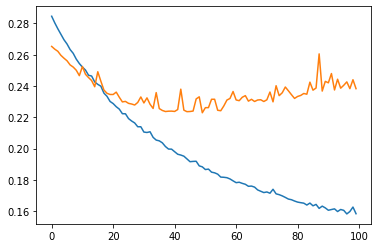

In [56]:
plt.plot(hist.history['loss'][10:])
plt.plot(hist.history['val_loss'][10:])
plt.show()

In [57]:
loss, acc = model.evaluate(test_x, test_y)
print("acc = ",acc)

128/128 [==============================] - 0s 3ms/step - loss: 0.2352 - acc: 0.9172
acc =  0.9171959161758423
